# Regerssion Problem

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=50, n_features = 5)

In [5]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,1.297629,-1.022029,0.154404,-0.322139,-2.220960
1,0.400382,0.377474,-0.073707,-0.115778,0.305303
2,1.301598,-0.012532,2.365917,0.113821,-1.409401
3,1.694973,0.981239,-0.210259,0.744716,0.021015
4,-0.796753,-0.494352,-1.692363,0.327505,0.039172


In [6]:
y[:5]

array([-46.40424127,  17.82879547,  37.37452572, 126.87405763,
       -23.05960522])

In [7]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [9]:
fs = SelectKBest(score_func= mutual_info_regression, k=3)
fs.fit(x,y)

SelectKBest(k=3,
            score_func=<function mutual_info_regression at 0x00000274B895E700>)

In [11]:
fs.scores_

array([0.13894211, 0.07534942, 0.00716611, 0.50723832, 0.13470551])

In [17]:
mi_score = pd.Series(fs.scores_, index=x.columns)
mi_score

0    0.138942
1    0.075349
2    0.007166
3    0.507238
4    0.134706
dtype: float64

<Axes: >

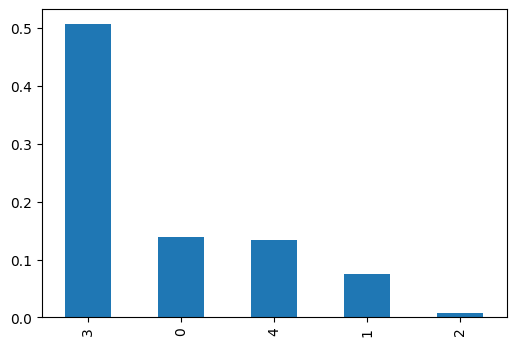

In [18]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [19]:
X_selected = fs.fit_transform(x,y)
X_selected = pd.DataFrame(X_selected)


In [20]:
X_selected.head()

,0,1,2
0,1.297629,-0.322139,-2.220960
1,0.400382,-0.115778,0.305303
2,1.301598,0.113821,-1.409401
3,1.694973,0.744716,0.021015
4,-0.796753,0.327505,0.039172


# Classification Problem

In [22]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [24]:
x,y = make_classification(n_samples=50, n_features=5, n_informative=2) # No of classes are given by n_informative
x = pd.DataFrame(x)

In [25]:
x.head()

,0,1,2,3,4
0,1.461774,-0.705686,-0.592074,-1.397996,-1.179562
1,0.863075,-0.965532,-1.209283,-0.570801,-0.699721
2,-1.135608,0.196400,0.440175,1.249269,0.914267
3,-1.028511,-1.018022,0.634361,1.686217,0.820912
4,0.372298,-1.555216,1.551420,0.282018,-0.308625


In [26]:
y[:5]  # As 2 classes are available, in the output 0 and 1 can be seen.

array([0, 0, 1, 0, 0])

<Axes: >

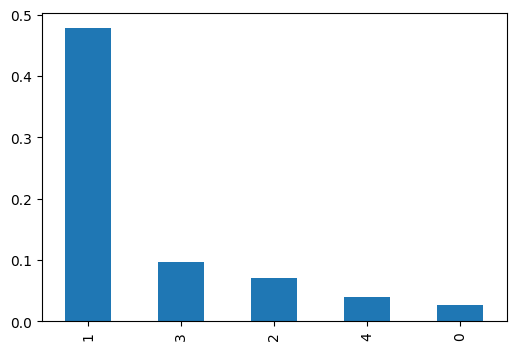

In [27]:
fs = SelectKBest(score_func=mutual_info_classif, k=3) # we need to select only 3 features k=3
fs.fit(x,y)
mi_score = pd.Series(fs.scores_, index=x.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [28]:
selected_X = fs.fit_transform(x,y)
selected_X = pd.DataFrame(selected_X)


In [29]:
selected_X.head()

,0,1,2
0,-0.705686,-0.592074,-1.397996
1,-0.965532,-1.209283,-0.570801
2,0.196400,0.440175,1.249269
3,-1.018022,0.634361,1.686217
4,-1.555216,1.551420,0.282018
